# Top 5 Quotes dummy model

In [1]:
import pandas as pd
import itertools
import re
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
import string
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

2022-03-04 14:19:52.385268: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-04 14:19:52.385634: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
file = "../raw_data/quotes - reduced.csv"
quotes = pd.read_csv(file, decimal=",")
quotes.head(3)

,quote,author,category
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed-no-source, best, life, love, mistak..."
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love..."
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed-no-source, dreams, love, reality, s..."


In [3]:
tags_list = quotes.category.to_list()
number_of_tags = []
for i in tags_list:
    number_of_tags.append(len(str(i).split(',')))

In [4]:
quotes['quotes_length'] = quotes['quote'].copy()
for index, row in quotes.iterrows():
    quotes.loc[index, "quotes_length"] = len(str(row['quotes_length']).split(' '))

## Cleaning data: tags are all lowercase, '-' were replaced with ',', duplicates were removed

In [5]:
for index, row in quotes.iterrows():
    quotes.loc[index, "category"] = str(row['category']).lower().replace('-',', ')

In [6]:
quotes['list_tags'] = quotes['category'].copy()
for index,row in quotes.iterrows():
    quotes.loc[index, 'count_tags'] = len(str(row['list_tags']).split(','))
quotes.count_tags.describe()

count    9930.000000
mean        4.945619
std         6.447668
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max       109.000000
Name: count_tags, dtype: float64

In [7]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(row['list_tags']).split(',')

In [8]:
for index,row in quotes.iterrows():
    quotes.at[index, 'list_tags'] = str(set(row['list_tags']))

In [9]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text
quotes['list_tags'] = quotes['list_tags'].apply(remove_punctuations)

In [32]:
vectorizer = TfidfVectorizer(max_df=0.75, min_df=0.1, stop_words="english",ngram_range=(1,2),norm='l1')
tags_vectorized = vectorizer.fit_transform(quotes['list_tags'])
dummy_tags = LatentDirichletAllocation(n_components=8, learning_method='batch',learning_decay=0.7)
lda_vectors = dummy_tags.fit_transform(tags_vectorized)

In [33]:
def print_topics(model, vectorizer):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names_out()[i], topic[i])
                        for i in topic.argsort()[:-10 - 1:-1]])
        

print_topics(dummy_tags, vectorizer.fit(quotes['list_tags']))

Topic 0:
[('life', 0.12720921615676584), ('love', 0.12694682474657562), ('inspirational', 0.1268947031387252), ('humor', 0.1264475513396742)]
Topic 1:
[('humor', 2248.192284611098), ('life', 0.12500717851732465), ('love', 0.12500638774285974), ('inspirational', 0.12500445221065354)]
Topic 2:
[('life', 108.02095876112037), ('love', 104.33692826597937), ('inspirational', 0.1250428658518582), ('humor', 0.12501413027737365)]
Topic 3:
[('love', 1265.2330145301132), ('life', 0.12500504267882265), ('humor', 0.125004976103565), ('inspirational', 0.12500312018053258)]
Topic 4:
[('inspirational', 2315.3198981415985), ('life', 0.1250317216013314), ('love', 0.12500405249298263), ('humor', 0.12500346054761652)]
Topic 5:
[('love', 1289.8747818894328), ('life', 0.12500361793103928), ('humor', 0.12500325111170638), ('inspirational', 0.1250025391034265)]
Topic 6:
[('life', 2306.740344591407), ('inspirational', 0.1250298836681489), ('love', 0.12500547229201353), ('humor', 0.12500526630582712)]
Topic 7:


In [12]:
lda_vectors[1]

array([0.05954128, 0.4432369 , 0.06007322, 0.06056688, 0.37658173])

In [13]:
quotes.head()

,quote,author,category,quotes_length,list_tags,count_tags
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed, no, source, best, life, love, mist...",41,out no life source of truth love attrib...,12.0
1,You've gotta dance like there's nobody watchin...,William W. Purkey,"dance, heaven, hurt, inspirational, life, love...",22,life love inspirational dance sing heaven...,7.0
2,You know you're in love when you can't fall as...,Dr. Seuss,"attributed, no, source, dreams, love, reality,...",18,no source love sleep attributed reality ...,7.0
3,A friend is someone who knows all about you an...,Elbert Hubbard,"friend, friendship, knowledge, love",13,knowledge love friendship friend,4.0
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive, out, hate, inspirational, lig...",20,out hate love inspirational peace light ...,8.0


In [14]:
quotes.iloc[-1] = ['A large crowd is assembled on an outdoor street scene , with toy balloons visible and a woman walking a pink bicyc', 'image','image','5','A large crowd is assembled on an outdoor street scene , with toy balloons visible and a woman walking a pink bicyc','1']

In [15]:
picture_vectorized = vectorizer.transform(quotes.iloc[-1])
lda_vectors_self = dummy_tags.transform(picture_vectorized)
for index,row in quotes.iterrows():
    quotes['topic'] = quotes.quote.copy()

In [16]:
for index,row in quotes.iterrows():
    quotes.at[index, 'topic'] = np.where(lda_vectors[index] == max(lda_vectors[index]))[0][0]

In [17]:
quotes.tail()

,quote,author,category,quotes_length,list_tags,count_tags,topic
9925,"That's it, cupcake. You're going down.","Rick Riordan, The Lost Hero","cupcake, humor, trash, talk",6,humor trash cupcake talk,4.0,2
9926,"Somewhere, the zebra is dancing.","Garth Stein, The Art of Racing in the Rain",humor,5,humor,1.0,1
9927,"Bad kitty!"" he screeched, snarling and baring ...","Julie Kagawa, The Iron Queen",humor,45,humor,1.0,1
9928,"Put some clothes on, you weird, yellow-eyed, t...","Jim Butcher, Fool Moon","harry, dresden, humor, women",12,dresden harry humor women,4.0,2
9929,A large crowd is assembled on an outdoor stree...,image,image,5,A large crowd is assembled on an outdoor stree...,1,3


(array([1480.,    0., 2529.,    0.,    0., 1788.,    0., 1851.,    0.,
        2282.]),
 array([0.0, 0.4, 0.8, 1.2000000000000002, 1.6, 2.0, 2.4000000000000004,
        2.8000000000000003, 3.2, 3.6, 4.0], dtype=object),
 <BarContainer object of 10 artists>)

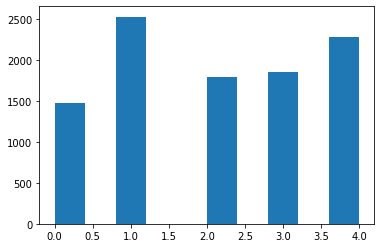

In [18]:
plt.hist(quotes.topic)

__Adding the image caption as the last line to our dataset to be able to see the closest neighbourhs__

In [19]:
image_topic = int(quotes.iloc[-1, [-1]])
image_topic

3

In [20]:
quotes = quotes.dropna()
only_topic = quotes[quotes.topic == image_topic]
only_topic.head()

,quote,author,category,quotes_length,list_tags,count_tags,topic
0,"I'm selfish, impatient and a little insecure. ...",Marilyn Monroe,"attributed, no, source, best, life, love, mist...",41,out no life source of truth love attrib...,12.0,3
4,Darkness cannot drive out darkness: only light...,"Martin Luther King Jr., A Testament of Hope: T...","darkness, drive, out, hate, inspirational, lig...",20,out hate love inspirational peace light ...,8.0,3
9,"The opposite of love is not hate, it's indiffe...",Elie Wiesel,"activism, apathy, hate, indifference, inspirat...",37,indifference hate love inspirational activ...,8.0,3
26,You don't love someone because they're perfect...,"Jodi Picoult, My Sister's Keeper","imperfect, love",18,love imperfect,2.0,3
27,We’re all a little weird. And life is a little...,"Robert Fulghum, True Love","love, weirdness",37,weirdness love,2.0,3


In [ ]:
tfidf_weight = vectorizer.fit_transform(only_topic['list_tags'].values.astype('U'))
nn_euc = NearestNeighbors(metric = 'minkowski')
nn_euc.fit(tfidf_weight)
image_index = -1
euc, indices = nn_euc.kneighbors(tfidf_weight[image_index], n_neighbors = 100)
neighbors_euc = pd.DataFrame({'euc': euc.flatten(), 'id': indices.flatten()})
result_top5 = (only_topic.merge(neighbors_euc, right_on = 'id', left_index = True).
                sort_values('euc')[['quote', 'author']]).head()

result_top5

In [ ]:
most_suiting = quotes[quotes.topic != image_topic]
own_tags = input("Please give me 5 words that are descriptive of your picture:")
most_suiting.iloc[-1] = [own_tags,'image','image','5',own_tags,'1',image_topic]
most_suiting.tail()

In [ ]:
tfidf_weight = vectorizer.fit_transform(most_suiting['list_tags'].values.astype('U'))
nn_euc = NearestNeighbors(metric = 'euclidean')
nn_euc.fit(tfidf_weight)
image_index = -1
euc, indices = nn_euc.kneighbors(tfidf_weight[image_index], n_neighbors = 100)
neighbors_euc = pd.DataFrame({'euc': euc.flatten(), 'id': indices.flatten()})
result_most_s = (only_topic.merge(neighbors_euc, right_on = 'id', left_index = True).
                sort_values('euc')[['quote', 'author']]).head(1)

result_most_s.quote

### Trying word2vec for the most suiting quote for better result

In [ ]:
word2vec = Word2Vec(sentences=most_suiting.list_tags, vector_size=100, min_count=1, window=10)

In [ ]:
# Function to convert a sentence (list of words) into a matrix representing the words in the embedding space
def embed_sentence(word2vec, sentence):
    embedded_sentence = []
    for word in sentence:
        if word in word2vec.wv:
            embedded_sentence.append(word2vec.wv[word])
        
    return np.array(embedded_sentence)

# Function that converts a list of sentences into a list of matrices
def embedding(word2vec, sentences):
    embed = []
    
    for sentence in sentences:
        embedded_sentence = embed_sentence(word2vec, sentence)
        embed.append(embedded_sentence)
        
    return embed

# Embed the training and test sentences
tags_embed = embedding(word2vec, most_suiting.list_tags)

# Pad the training and test embedded sentences
tags_pad = pad_sequences(tags_embed, dtype='float32', padding='post', maxlen=200)

In [ ]:
for X in most_suiting.list_tags:
    assert type(X) == np.ndarray
    assert X.shape[-1] == word2vec.wv.vector_size

assert tags_pad.shape[0] == len(most_suiting.list_tags)

In [ ]:
result = word2vec.most_similar(positive=[own_tags], topn=1)
result

### GridSearchCV for LDA finetuning (defining the number of components)

In [27]:
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lda', LatentDirichletAllocation()),
])



In [28]:
pipeline.get_params()

{'memory': None,
 'steps': [('tfidf', TfidfVectorizer()), ('lda', LatentDirichletAllocation())],
 'verbose': False,
 'tfidf': TfidfVectorizer(),
 'lda': LatentDirichletAllocation(),
 'tfidf__analyzer': 'word',
 'tfidf__binary': False,
 'tfidf__decode_error': 'strict',
 'tfidf__dtype': numpy.float64,
 'tfidf__encoding': 'utf-8',
 'tfidf__input': 'content',
 'tfidf__lowercase': True,
 'tfidf__max_df': 1.0,
 'tfidf__max_features': None,
 'tfidf__min_df': 1,
 'tfidf__ngram_range': (1, 1),
 'tfidf__norm': 'l2',
 'tfidf__preprocessor': None,
 'tfidf__smooth_idf': True,
 'tfidf__stop_words': None,
 'tfidf__strip_accents': None,
 'tfidf__sublinear_tf': False,
 'tfidf__token_pattern': '(?u)\\b\\w\\w+\\b',
 'tfidf__tokenizer': None,
 'tfidf__use_idf': True,
 'tfidf__vocabulary': None,
 'lda__batch_size': 128,
 'lda__doc_topic_prior': None,
 'lda__evaluate_every': -1,
 'lda__learning_decay': 0.7,
 'lda__learning_method': 'batch',
 'lda__learning_offset': 10.0,
 'lda__max_doc_update_iter': 100,
 '

In [ ]:
parameters = {'tfidf__max_df':(0.75,0.85,0.95),'lda__n_components': (5,7,9),'lda__learning_decay':(0.5,0.7,1),'tfidf__min_df':(0.1,1),'tfidf__ngram_range': ((1,1),(1,2)),'tfidf__norm': ('l2','l1'),'lda__learning_method':('batch','online')}
grid_search = GridSearchCV(pipeline, parameters,cv=5,verbose=2)

grid_search.fit(quotes['list_tags'])

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.1s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.1s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.9s
[CV] END lda__le

[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   3.9s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.0s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   3.8s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.2s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.7s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=

[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.2s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.1s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.1s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.5s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=

[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.8s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.4s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.4s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   5.1s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=

[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.1s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.5s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.2s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__

[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.7s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.8s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   5.1s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.9s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=7, tfidf__

[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.8s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.8s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__

[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.4s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=batch, lda__n_components=9, tfidf__

[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   3.7s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   3.8s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.8s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_compo

[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   3.1s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   3.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.0s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.5s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.7s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_compo

[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   3.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   3.5s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_compo

[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.2s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   3.9s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.1s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.0s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_compo

[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.4s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.5s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.5s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.5s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, t

[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.4s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.5s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.4s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=7, t

[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   6.8s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   6.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   6.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   6.9s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   6.9s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, t

[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   6.9s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   6.6s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   6.8s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   7.0s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   6.9s
[CV] END lda__learning_decay=0.5, lda__learning_method=online, lda__n_components=9, t

[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.4s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   3.9s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.7s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=

[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.1s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.4s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.1s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.6s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   5.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=

[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.1s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   5.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=

[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.4s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.9s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.9s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.9s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=

[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.3s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.1s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.3s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__

[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.8s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.9s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.9s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.7s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   5.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=7, tfidf__

[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   5.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   5.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   5.3s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.9s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   5.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__

[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.7s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.8s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   5.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   5.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.4s
[CV] END lda__learning_decay=0.7, lda__learning_method=batch, lda__n_components=9, tfidf__

[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   3.7s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.1s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.1s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.7s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_compo

[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   3.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   3.6s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   3.9s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_compo

[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   3.8s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   3.6s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.1s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.3s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_compo

[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   3.4s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.1s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   3.7s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   3.7s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   5.1s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_compo

[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.5s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.6s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.6s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.7s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, t

[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.6s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.4s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, tfidf__max_df=0.95, tfidf__min_df=1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.3s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=7, t

[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   6.5s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   6.4s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   7.8s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   7.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.75, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   7.0s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, t

[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   6.4s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   6.4s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   7.2s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   6.8s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, tfidf__max_df=0.85, tfidf__min_df=1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   6.5s
[CV] END lda__learning_decay=0.7, lda__learning_method=online, lda__n_components=9, t

[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   3.7s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   3.9s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   4.0s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   3.9s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.75, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l2; total time=   5.4s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__ma

[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.0s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   3.9s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   4.5s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1), tfidf__norm=l1; total time=   5.0s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.85, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   3.9s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__ma

[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   3.8s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.5s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l2; total time=   4.7s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.0s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__max_df=0.95, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2), tfidf__norm=l1; total time=   4.0s
[CV] END lda__learning_decay=1, lda__learning_method=batch, lda__n_components=5, tfidf__ma